In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

In [2]:
df = pd.read_csv('Brain Tumor.csv')
df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


Tampilkan statistika dari data.

In [3]:
df.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


Cek persentase dari jumlah target kelas.

Class
0    2079
1    1683
Name: count, dtype: int64
Class
0    55.263158
1    44.736842
Name: count, dtype: float64


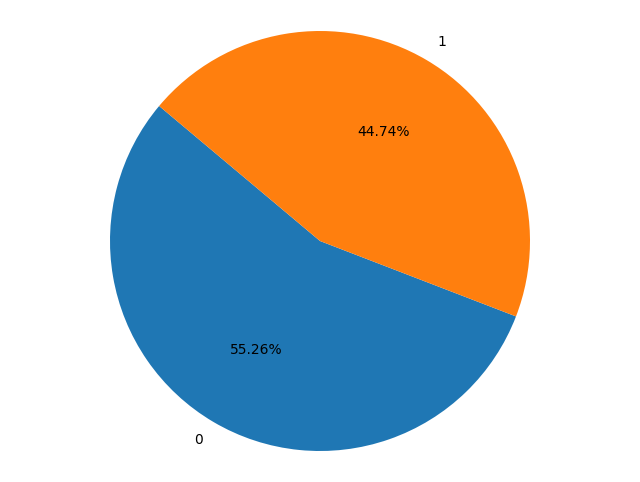

In [4]:
target_counts = df['Class'].value_counts()
print(target_counts)

total = target_counts.sum()
target_percentages = (target_counts / total) * 100
print(target_percentages)

plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%.2f%%', startangle=140)
plt.axis('equal')
plt.show()

Tampilkan grafik histogram dari data yang diperoleh

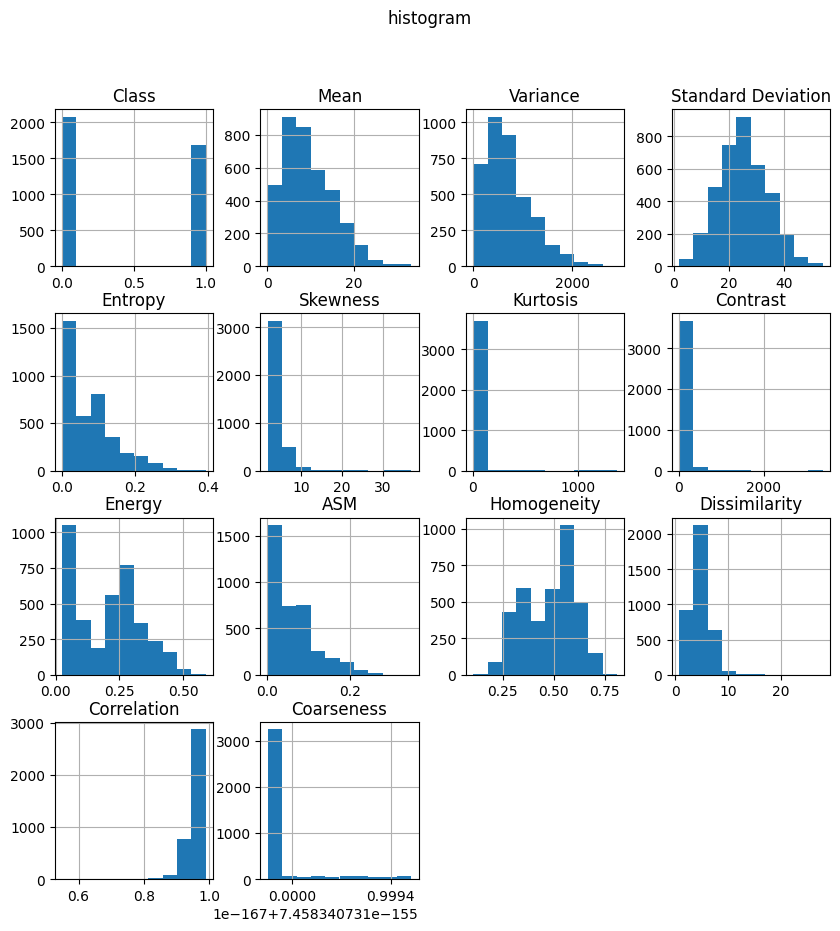

In [5]:
df.hist(figsize=(10,10))
plt.suptitle('histogram')
plt.show()

Cek missing values

In [6]:
df.isnull().sum()

Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

Split data menjadi train dan test

In [7]:
df_X = df.drop(['Class','Image'],axis=1)
df_y = df[['Class']]

In [8]:
#categorical encoding
cats = df_X.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
cat_en = LabelEncoder()
for i in cat_features:
  df_X[i] = cat_en.fit_transform(df_X[i])

df_X

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)
X_train

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
2113,7.701248,668.524790,25.855846,0.050645,4.039352,17.600281,207.043673,0.195900,0.038377,0.433310,5.993841,0.952728,7.458341e-155
1904,5.432709,292.543530,17.103904,0.086691,3.682874,14.060815,85.514401,0.259551,0.067367,0.501297,4.706346,0.955360,7.458341e-155
887,8.487442,271.400672,16.474243,0.115614,2.423089,6.312857,26.724029,0.302185,0.091316,0.597493,2.340372,0.973414,7.458341e-155
3538,21.847992,1485.607019,38.543573,0.054533,2.190532,5.043024,173.570575,0.203080,0.041242,0.491465,4.875517,0.955227,7.458341e-155
685,6.619110,838.043966,28.948989,0.001045,4.895070,25.222012,355.164776,0.026931,0.000725,0.243588,10.329552,0.880350,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,20.410446,2461.914277,49.617681,0.003719,2.940882,8.998862,184.659467,0.051119,0.002613,0.350380,6.172899,0.959051,7.458341e-155
1294,21.635605,1092.796735,33.057476,0.058003,1.967397,4.176760,109.953991,0.209635,0.043947,0.500536,4.305617,0.960184,7.458341e-155
860,14.804428,653.496088,25.563570,0.055551,2.146450,4.842046,76.058559,0.204632,0.041874,0.532544,3.055631,0.953825,7.458341e-155
3507,3.771378,145.206094,12.050149,0.118907,3.765422,15.111219,50.725265,0.306968,0.094229,0.603395,2.498389,0.947850,7.458341e-155


Normalisasi data

In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[2.29863891e-001, 2.28854257e-001, 4.61556164e-001, ...,
        1.95704594e-001, 9.15458857e-001, 0.00000000e+000],
       [1.61454681e-001, 9.95371444e-002, 2.93818009e-001, ...,
        1.48277148e-001, 9.21432276e-001, 0.00000000e+000],
       [2.53572053e-001, 9.22651511e-002, 2.81750035e-001, ...,
        6.11218007e-002, 9.62413479e-001, 0.00000000e+000],
       ...,
       [4.44064677e-001, 2.23685200e-001, 4.55954439e-001, ...,
        8.74697855e-002, 9.17947826e-001, 0.00000000e+000],
       [1.11356211e-001, 4.88610771e-002, 1.96958653e-001, ...,
        6.69426963e-002, 9.04384970e-001, 8.10653275e-168],
       [2.18266107e-001, 4.06737133e-001, 6.25965618e-001, ...,
        2.14415372e-001, 9.22293933e-001, 0.00000000e+000]])

# Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9743135518157662
Precision: 0.9895397489539749
Recall: 0.9517102615694165
F1 Score: 0.9702564102564103
Sensitivity: 0.9517102615694165
Specificity: 0.9920886075949367
AUROC: 0.9929354608664644


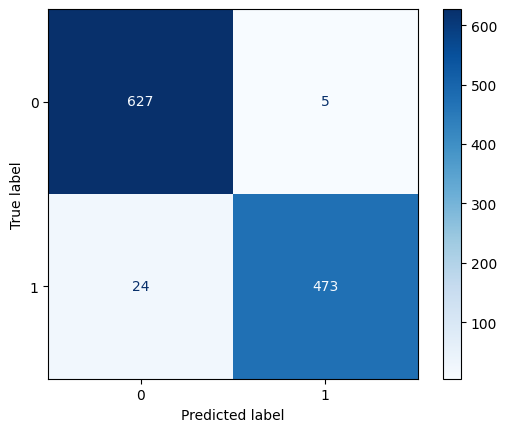

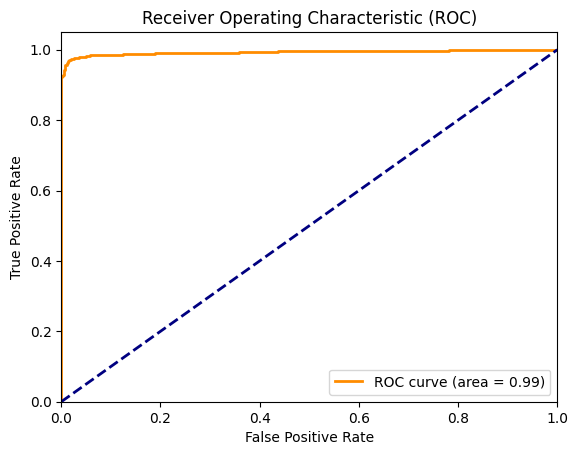

In [11]:
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_pred_proba)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('AUROC:', auroc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# KNN

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.9813994685562445
Precision: 0.9958333333333333
Recall: 0.9617706237424547
F1 Score: 0.9785056294779938
Sensitivity: 0.9617706237424547
Specificity: 0.9968354430379747
AUROC: 0.9944890864172375


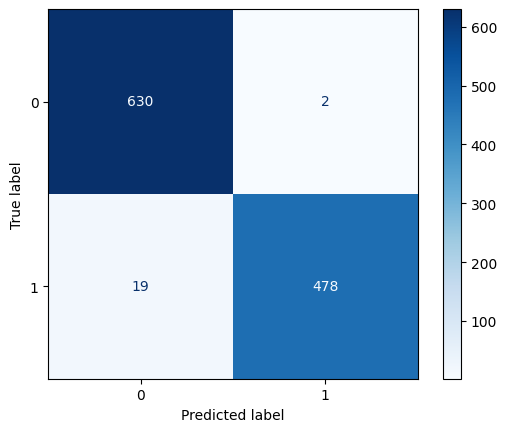

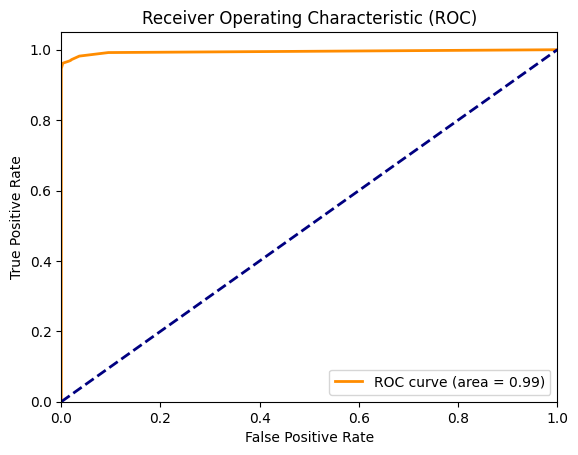

In [12]:
model=KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_pred_proba)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('AUROC:', auroc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

Accuracy: 0.9822852081488043
Precision: 0.9857433808553971
Recall: 0.9738430583501007
F1 Score: 0.979757085020243
Sensitivity: 0.9738430583501007
Specificity: 0.9889240506329114
AUROC: 0.9813835544915062


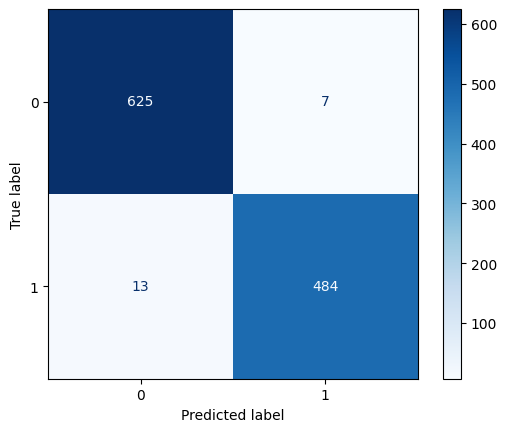

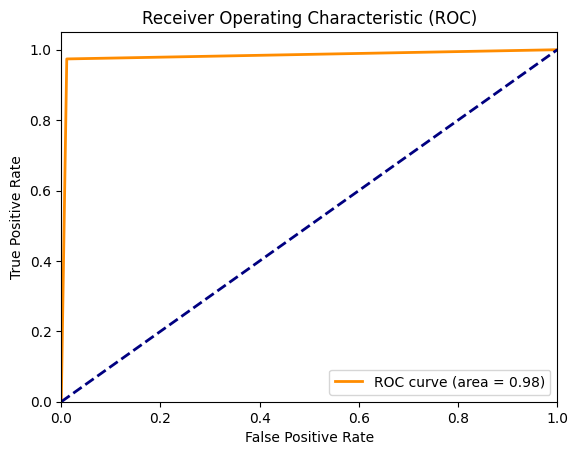

In [13]:
model=DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_pred_proba)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('AUROC:', auroc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Random Forest

<ipython-input-14-92a844bada34>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy: 0.9867139061116031
Precision: 0.9958847736625515
Recall: 0.9738430583501007
F1 Score: 0.9847405900305188
Sensitivity: 0.9738430583501007
Specificity: 0.9968354430379747
AUROC: 0.9962146295494487


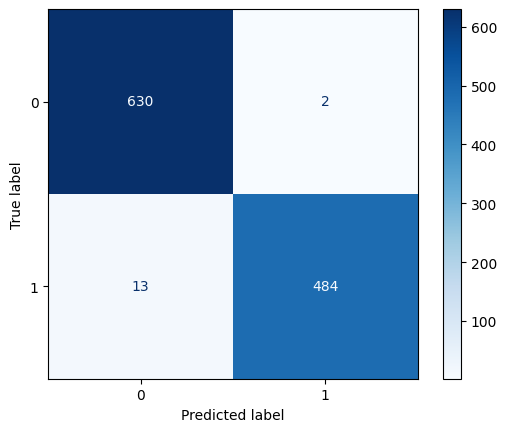

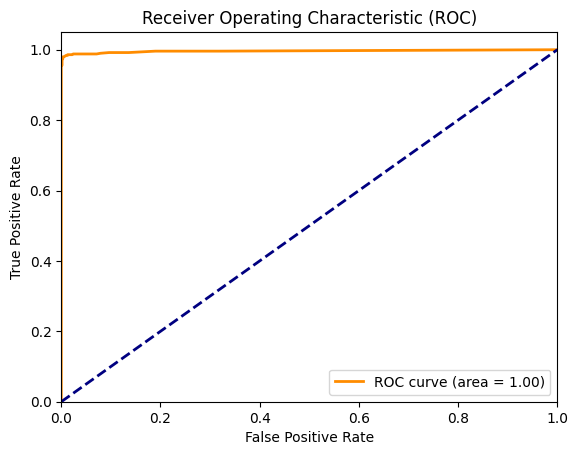

In [14]:
model=RandomForestClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_pred_proba)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('AUROC:', auroc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# RNN




Epoch 1/20
66/66 [==============================] - 4s 16ms/step - loss: 0.2758 - accuracy: 0.9226 - val_loss: 0.0841 - val_accuracy: 0.9810
Epoch 2/20
66/66 [==============================] - 0s 7ms/step - loss: 0.0787 - accuracy: 0.9744 - val_loss: 0.0495 - val_accuracy: 0.9886
Epoch 3/20
66/66 [==============================] - 0s 6ms/step - loss: 0.0792 - accuracy: 0.9744 - val_loss: 0.0765 - val_accuracy: 0.9791
Epoch 4/20
66/66 [==============================] - 0s 6ms/step - loss: 0.0683 - accuracy: 0.9772 - val_loss: 0.0468 - val_accuracy: 0.9886
Epoch 5/20
66/66 [==============================] - 0s 7ms/step - loss: 0.0612 - accuracy: 0.9805 - val_loss: 0.0497 - val_accuracy: 0.9886
Epoch 6/20
66/66 [==============================] - 1s 10ms/step - loss: 0.0573 - accuracy: 0.9786 - val_loss: 0.0481 - val_accuracy: 0.9905
Epoch 7/20
66/66 [==============================] - 1s 9ms/step - loss: 0.0499 - accuracy: 0.9820 - val_loss: 0.0415 - val_accuracy: 0.9905
Epoch 8/20
66/66 [

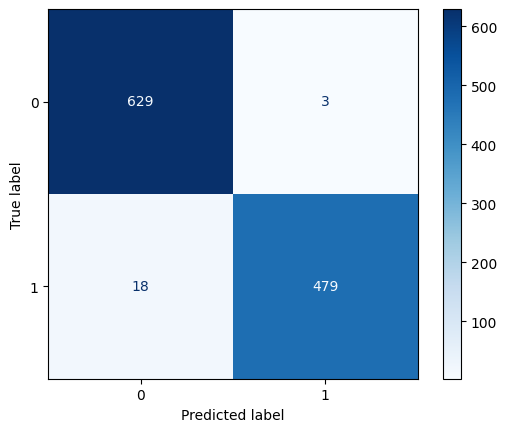

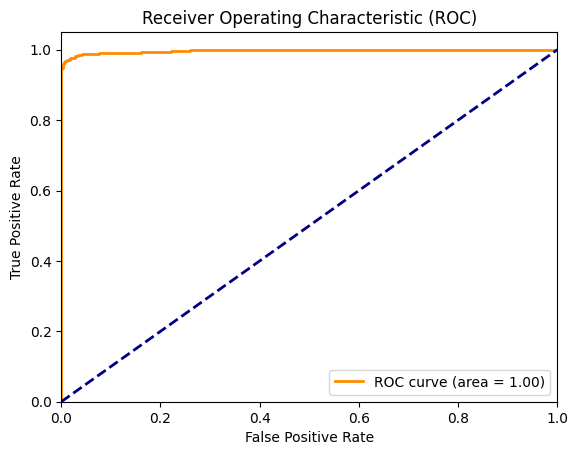

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for RNN
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define RNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(64, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

predictions = model.predict(X_test_scaled)
y_pred = (predictions > 0.5).astype(int)
y_pred_proba = predictions

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_pred_proba)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('AUROC:', auroc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# HASIL PARAMETER


1.   **Logistic Regression:**
 *   Accuracy: 0.9743135518157662
 *   Precision: 0.9895397489539749
 *   Recall: 0.9517102615694165
 *   F1 Score: 0.9702564102564103
 *   Sensitivity: 0.9517102615694165
 *   Specificity: 0.9920886075949367
 *   AUROC: 0.9929354608664644


2.   **KNN:**
 *   Accuracy: 0.9813994685562445
 *   Precision: 0.9958333333333333
 *   Recall: 0.9617706237424547
 *   F1 Score: 0.9785056294779938
 *   Sensitivity: 0.9617706237424547
 *   Specificity: 0.9968354430379747
 *   AUROC: 0.9944890864172375


3.   **Decision Tree:**
 *   Accuracy: 0.9822852081488043
 *   Precision: 0.9857433808553971
 *   Recall: 0.9738430583501007
 *   F1 Score: 0.979757085020243
 *   Sensitivity: 0.9738430583501007
 *   Specificity: 0.9889240506329114
 *   AUROC: 0.9813835544915062


4.   **Random Forest:**
 *   Accuracy: 0.9867139061116031
 *   Precision: 0.9958847736625515
 *   Recall: 0.9738430583501007
 *   F1 Score: 0.9847405900305188
 *   Sensitivity: 0.9738430583501007
 *   Specificity: 0.9968354430379747
 *   AUROC: 0.9962146295494487


5.   **RNN:**
 *   Accuracy: 0.9813994685562445
 *   Precision: 0.9937759336099585
 *   Recall: 0.9637826961770624
 *   F1 Score: 0.9785495403472931
 *   Sensitivity: 0.9637826961770624
 *   Specificity: 0.995253164556962
 *   AUROC: 0.9969882586659196
